# Creating BA categories for first and last 9 years separately, for comparison

This will then be used for analysis in separate files

In [1]:
# Import libraries

import os
import glob
from osgeo import gdal
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import scipy.ndimage
import pandas as pd
import datetime as dt
import rasterio as rio
import re
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em
from pyhdf.SD import SD, SDC
import pprint
import matplotlib.colors as colors 
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import csv
import pprint
import h5py 
import gdal
from gdalconst import *

In [10]:
# Set input directory, and change working directory - plug in D drive
inDir = "D:\\masters_data\\MODIS_BA" 
os.chdir(inDir)                                                               # Change to working directory
outDir = os.path.normpath(os.path.split(inDir)[0] + os.sep + 'output') + '\\' # Create and set output directory
if not os.path.exists(outDir): os.makedirs(outDir)

In [11]:
# select MODIS files
MODISFiles = glob.glob('*h20v08*') 
print(len(MODISFiles))
# print(MODISFiles[0])

216


In [13]:
First_MODISFiles = MODISFiles[:108]
Second_MODISFiles = MODISFiles[108:]

In [14]:
print(len(First_MODISFiles), len(Second_MODISFiles))

108 108


In [10]:
# create BA array for first 9 years (2002 - 2010)
first_BA = np.zeros((2400, 2400))
NUMBER = 0

for j in First_MODISFiles:
    filename= First_MODISFiles[NUMBER]
    dataset = gdal.Open(filename,GA_ReadOnly)
    subdataset = dataset.GetSubDatasets()[1]
    
    with rio.open(First_MODISFiles[NUMBER]) as dataset:
        crs = dataset.read_crs()
    
    file_name = First_MODISFiles[NUMBER]
    file = SD(file_name, SDC.READ)   
    
    datasets_dic = file.datasets()
    sds_obj = file.select(0)
    data = sds_obj.get() 
    result = np.where(data > 0)
    
    first_BA[result] += 1
    
    NUMBER += 1


C:\Users\samgr\miniconda3\envs\GDAL_test\lib\site-packages\rasterio\__init__.py:218: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [11]:
# create BA array for second 9 years (2011 - 2018)
second_BA = np.zeros((2400, 2400))
NUMBER = 0

for j in Second_MODISFiles:
    filename= Second_MODISFiles[NUMBER]
    dataset = gdal.Open(filename,GA_ReadOnly)
    subdataset = dataset.GetSubDatasets()[1]
    
    with rio.open(Second_MODISFiles[NUMBER]) as dataset:
        crs = dataset.read_crs()
    
    file_name = Second_MODISFiles[NUMBER]
    file = SD(file_name, SDC.READ)   
    
    datasets_dic = file.datasets()
    sds_obj = file.select(0)
    data = sds_obj.get() 
    result = np.where(data > 0)
    
    second_BA[result] += 1
    
    NUMBER += 1


In [12]:
np.savetxt("D:\\masters_data\\output\\first_BA.csv", first_BA, delimiter=",")
np.savetxt("D:\\masters_data\\output\\second_BA.csv", second_BA, delimiter=",")

Note - Doesn't only account for Savannah regions

In [13]:
print(first_BA.mean(), first_BA.max())
print(second_BA.mean(), second_BA.max())

2.4331465277777777 13.0
2.159437326388889 13.0


In [25]:
# need to add heading row to first/second BA 

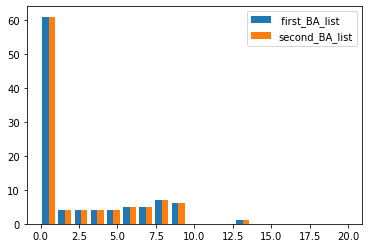

In [20]:
first_BA_list = []
second_BA_list = []

for i in range(0,101):
    first_BA_list.append(np.quantile(first_BA, i/100))
    second_BA_list.append(np.quantile(first_BA, i/100))

bins = np.linspace(0, 20, 20)

plt.hist([first_BA_list, second_BA_list], bins, label=[' first_BA_list', 'second_BA_list'])
# plt.hist(first_BA_list, bins, alpha=0.5, label='first_BA_list')
# plt.hist(second_BA_list, bins, alpha=0.5, label='second_BA')
plt.legend(loc='upper right')
plt.show()

In [27]:
print("First_BA = 1:\t {} times".format(np.count_nonzero(first_BA == 1)))
print("Second_BA = 1:\t {} times".format(np.count_nonzero(second_BA == 1)))
print()

print("First_BA < 10:\t {} times".format(np.count_nonzero(first_BA < 10)))
print("Second_BA < 10:\t {} times".format(np.count_nonzero(second_BA < 10)))
print()

print("First_BA >= 10:\t {} times".format(np.count_nonzero(first_BA >= 10)))
print("Second_BA >= 10:\t {} times".format(np.count_nonzero(second_BA >= 10)))
print()


First_BA = 1:	 432789 times
Second_BA = 1:	 464525 times

First_BA < 10:	 5719447 times
Second_BA < 10:	 5714824 times

First_BA >= 10:	 40553 times
Second_BA >= 10:	 45176 times



In [41]:
first_BA_0 = np.count_nonzero(first_BA == 0)
first_BA_1 = np.count_nonzero(first_BA == 1)
first_BA_2 = np.count_nonzero(first_BA == 2)
first_BA_3 = np.count_nonzero(first_BA == 3)
first_BA_4 = np.count_nonzero(first_BA == 4)
first_BA_5 = np.count_nonzero(first_BA == 5)
first_BA_6 = np.count_nonzero(first_BA == 6)
first_BA_7 = np.count_nonzero(first_BA == 7)
first_BA_8 = np.count_nonzero(first_BA == 8)
first_BA_9 = np.count_nonzero(first_BA == 9)
first_BA_10 = np.count_nonzero(first_BA == 10)
first_BA_10_ = np.count_nonzero(first_BA > 10)

second_BA_0 = np.count_nonzero(second_BA == 0)
second_BA_1 = np.count_nonzero(second_BA == 1)
second_BA_2 = np.count_nonzero(second_BA == 2)
second_BA_3 = np.count_nonzero(second_BA == 3)
second_BA_4 = np.count_nonzero(second_BA == 4)
second_BA_5 = np.count_nonzero(second_BA == 5)
second_BA_6 = np.count_nonzero(second_BA == 6)
second_BA_7 = np.count_nonzero(second_BA == 7)
second_BA_8 = np.count_nonzero(second_BA == 8)
second_BA_9 = np.count_nonzero(second_BA == 9)
second_BA_10 = np.count_nonzero(second_BA == 10)
second_BA_10_ = np.count_nonzero(second_BA > 10)

In [47]:
FIRST_list = [
    # first_BA_0, 
    first_BA_1, first_BA_2, first_BA_3, first_BA_4, first_BA_5, first_BA_6, 
    first_BA_7, first_BA_8, first_BA_9, first_BA_10,first_BA_10_
]
SECOND_list = [
    # second_BA_0, 
    second_BA_1, second_BA_2, second_BA_3, second_BA_4, second_BA_5, second_BA_6, 
    second_BA_7, second_BA_8, second_BA_9, second_BA_10,second_BA_10_
]

frequency = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '10+'] 

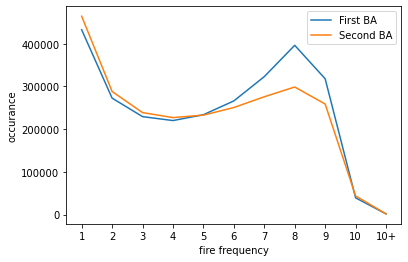

<Figure size 432x288 with 0 Axes>

In [51]:
plt.plot(frequency, FIRST_list, label = "First BA")
plt.plot(frequency, SECOND_list, label = "Second BA")
plt.legend()
plt.xlabel('fire frequency')
plt.ylabel('occurance')
plt.show()
plt.savefig("fire_frequency.jpg")